In [2]:
import sys
import numpy as np
import datetime
%pylab inline
from os import listdir, path, chdir

Populating the interactive namespace from numpy and matplotlib


## Use this for data from today:

In [23]:
target_folder = datetime.datetime.now().strftime("%m-%d-%Y")
data_folder = "/home/photon/data/"+target_folder
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

## Use this to pull from a different day:

In [3]:
data_folder = "/home/photon/data/06-10-2021"
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [4]:
allFiles = listdir(data_folder)
allFiles.sort()
set(zip(allFiles,range(len(allFiles))))

{('10-31-25_raw.npz', 0),
 ('10-43-21_raw.npz', 1),
 ('10-52-57_raw.npz', 2),
 ('11-11-07_raw.npz', 3),
 ('11-16-46_raw.npz', 4),
 ('11-28-59_raw.npz', 5),
 ('17-20-32_raw.npz', 6)}

In [5]:
#Import last file in folder (by default)
data_npz = np.load(allFiles[4])
VacCorrected = data_npz['VacCorrected']
ncount = data_npz['ncount']

In [6]:
n = np.sqrt(ncount)
print("Std dev. of LO: ", n.std()/n.mean())
print("Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean())

Std dev. of LO:  0.0019117329222417417
Peak to Peak as fraction of LO mean:  0.013731524574051326


In [7]:
scaled_vc = np.sqrt(2.0/ncount)*VacCorrected

In [8]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(650)]

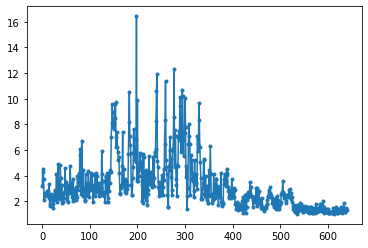

In [9]:
plot(avg_n_quick[10:],".-")  # look at the modes with their amplitudes

Text(0, 0.5, '$\\langle n \\rangle$')

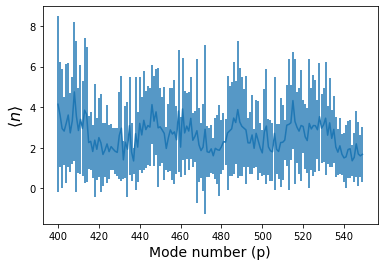

In [24]:
start = 400
stop = 550
std_dev_n = np.zeros(650)
avg_n = np.zeros(650)
for i in range(start,stop):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)

errorbar(arange(start,stop,1),avg_n[start:stop],yerr=std_dev_n[start:stop])
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

In [12]:
mode = 430
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = (np.abs(scaled_vc[mode,:,:]).std(axis=0))**2

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

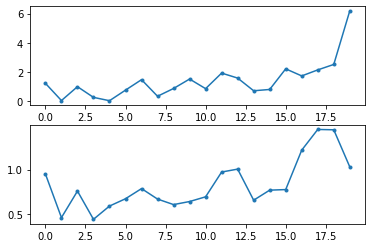

In [13]:
subplot(211)
plot(check_n,".-")
#ylim(ymin=0)
subplot(212)
plot(check_var,".-")
#ylim(ymin=0)

Now pick the slice of rounds to analyze

In [14]:
output = scaled_vc[mode,:,:].flatten('F')

In [15]:
x = np.real(output)
y = np.imag(output)

Average amplitude: 2.032765


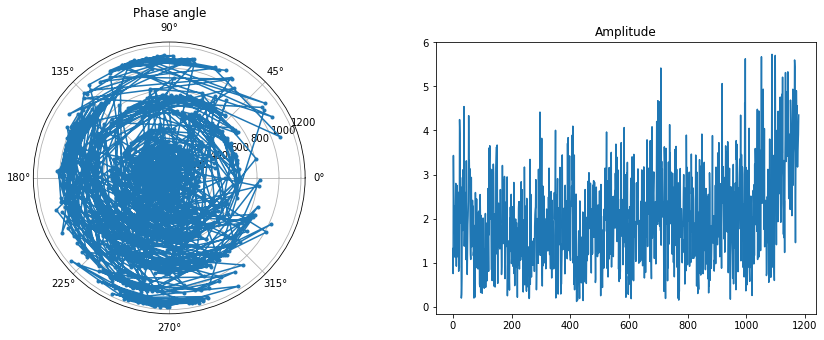

In [16]:
# Look at the average amplitude and a plot of phase angle and amplitude vs. shot number:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121, polar=True)
plt.plot(angle(output),np.arange(len(output)),".-")
plt.title("Phase angle")
plt.subplot(122)
#plt.ylim(0,20)
plt.plot(abs(output))
plt.title("Amplitude")
print("Average amplitude: %f" % np.average(abs(output)))

In [17]:
0.5*(np.abs(output).mean())**2  # the easy calculation

2.0660667259742573

In [18]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

2.6098550771100895

In [19]:
X,Y,Z = Q.kernel_estimate(x,y)

KDE kernel factor:  0.3076236107771372


In [20]:
print("<n_Q> = ",Q.avg_n(X,Y,Z))  # the calculated from Q function
print("<n_Q-raw> = ", Q.avg_n_raw(x,y))
print("StDev n = ", Q.std_n(X,Y,Z))
print("StDev n raw = ", Q.std_n_raw(x,y))

<n_Q> =  106.81848874159223
<n_Q-raw> =  2.6098550771100895
StDev n =  nan
StDev n raw =  2.1438504888510925


/home/photon/code/Qfunction/Qfunction.py:157: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsquared - avgn**2)


In [21]:
print("Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100))
print("Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100))

Kernel estimate noise as percent: nan
Raw quadratures noise as percent: 32.70


KDE kernel factor:  0.3076236107771372


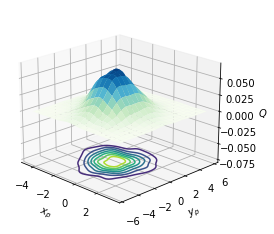

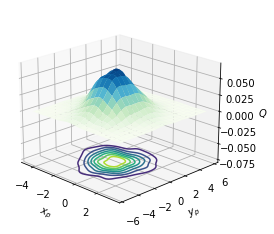

In [22]:
Q.qsurf(x,y)  # good looking figures though!

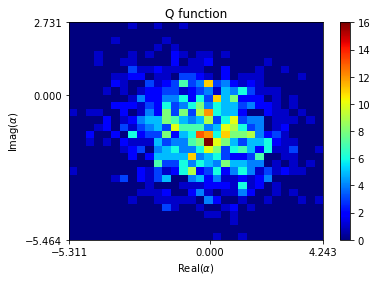

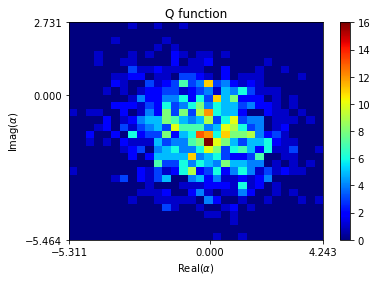

In [42]:
Q.qfuncimage(output)